In [1]:
import numpy as np
import random
from sklearn.cluster import KMeans

interests = ['larping', 'acting', 'gunsmithing', 'quilling', 'leather crafting', 'yoyoing',
           'tatting', 'juggling', 'glassblowing', 'couponing', 'embroidery', 'lapidary']
user_rating = [1,2,3,4,5]

all_data = []
for user_id in range(1,1001):
    user_data = []
    interest = list(np.random.choice(interests, replace=False, size=random.randint(1,3)))
    rating = np.random.choice(user_rating)
    user_data.append({
            'id': user_id,
            'interests': interest,
            'rating': rating
        })
    all_data.extend(user_data)
    

In [2]:
all_data[:10]

[{'id': 1, 'interests': ['leather crafting'], 'rating': 5},
 {'id': 2, 'interests': ['juggling', 'larping'], 'rating': 5},
 {'id': 3, 'interests': ['embroidery', 'larping'], 'rating': 5},
 {'id': 4, 'interests': ['larping', 'embroidery', 'gunsmithing'], 'rating': 4},
 {'id': 5, 'interests': ['yoyoing'], 'rating': 1},
 {'id': 6, 'interests': ['juggling', 'larping', 'couponing'], 'rating': 2},
 {'id': 7, 'interests': ['larping'], 'rating': 5},
 {'id': 8, 'interests': ['glassblowing', 'yoyoing'], 'rating': 5},
 {'id': 9, 'interests': ['leather crafting', 'couponing'], 'rating': 4},
 {'id': 10, 'interests': ['acting'], 'rating': 2}]

In [3]:
dist = np.empty([len(all_data),len(interests)])

for i in range(len(all_data)):
    dist[i,:] = np.array([(interests[j] in all_data[i]['interests']) for j in range(len(interests))])/np.sqrt(len(all_data[i]['interests']))

In [4]:
KM = KMeans(n_clusters = 30).fit(dist)

In [5]:
groups = KM.predict(dist)

In [6]:
np.array(all_data)[groups==0]

array([ {'interests': ['embroidery', 'leather crafting', 'quilling'], 'rating': 5, 'id': 11},
       {'interests': ['quilling', 'leather crafting', 'acting'], 'rating': 3, 'id': 16},
       {'interests': ['larping', 'leather crafting', 'quilling'], 'rating': 2, 'id': 86},
       {'interests': ['acting', 'tatting', 'leather crafting'], 'rating': 5, 'id': 87},
       {'interests': ['lapidary', 'leather crafting', 'quilling'], 'rating': 3, 'id': 96},
       {'interests': ['leather crafting', 'yoyoing', 'quilling'], 'rating': 3, 'id': 101},
       {'interests': ['larping', 'quilling', 'leather crafting'], 'rating': 1, 'id': 112},
       {'interests': ['yoyoing', 'quilling', 'leather crafting'], 'rating': 3, 'id': 126},
       {'interests': ['leather crafting', 'tatting', 'quilling'], 'rating': 1, 'id': 158},
       {'interests': ['leather crafting', 'quilling', 'tatting'], 'rating': 3, 'id': 186},
       {'interests': ['leather crafting', 'lapidary', 'quilling'], 'rating': 2, 'id': 189},
 

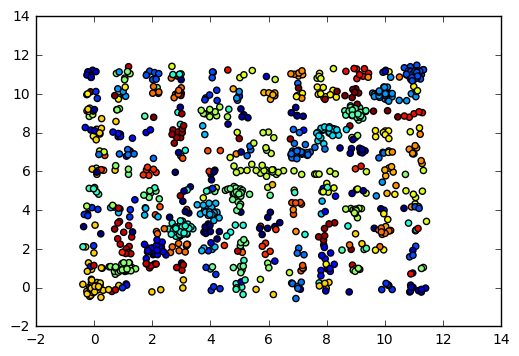

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

ep = 0.2
xplot = []
yplot = []

for i in range(len(all_data)):
    m = 1
    xplot += [0]
    yplot += [0]
    for j in range(len(all_data[i]['interests'])):
        xplot[-1] += m*interests.index(all_data[i]['interests'][j])
        yplot[-1] += m*interests.index(all_data[i]['interests'][len(all_data[i]['interests'])-j-1])
        m /= len(interests)
    xplot[-1] += random.gauss(0,ep)
    yplot[-1] += random.gauss(0,ep)
    
plt.scatter(xplot,yplot,c=groups)